由于鸢尾花数据集每个数据含有4个属性，最终要依据四个属性将花分类为3种，因此该问题属于多分类问题，考虑使用softmax回归。对于数据可视化，由于数据集中没有对鸢尾花属性的分类标准，通过查阅资料得知需要训练决策树模型划分分类边界，再进行数据可视化分类。

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

#split train data and test data
iris=load_iris()
data=iris.data
target=iris.target
data_train, data_test, target_train, target_test=train_test_split(data, target, test_size=0.2, random_state=224)
train_result=[]
test_result=[]
sl=[]
sw=[]
classify_data=[]
classify_label=[]
test_predict=[]
for i in range(len(data)):
  classify_data.append([data[i][0], data[i][1]])
  classify_label.append(target[i])
for i in range(len(data_test)):
  sl.append(data_test[i][0])
  sw.append(data_test[i][1])

In [55]:
for i in np.linspace(0.02, 1, 49):
  #train model
  softmax=LogisticRegression(penalty='l2', multi_class='multinomial', solver='lbfgs', C=i, max_iter=1000)
  softmax=softmax.fit(data_train, target_train)

  #test model
  train_result.append(accuracy_score(softmax.predict(data_train), target_train))
  test_result.append(accuracy_score(softmax.predict(data_test), target_test))
  test_predict.append(softmax.predict(data_test))


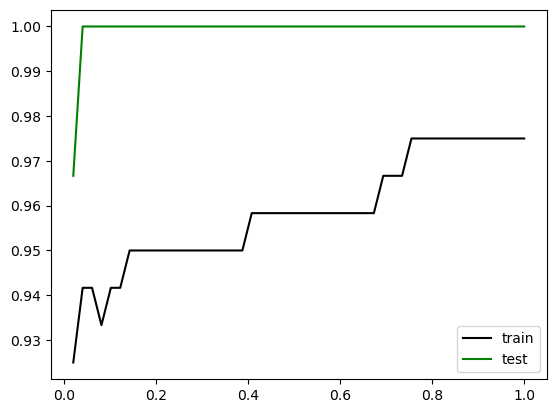

In [56]:
graph=[train_result, test_result]
color=['black', 'green']
label=['train', 'test']
plt.figure()
for i in range(len(graph)):
  plt.plot(np.linspace(0.02, 1, 49), graph[i], color[i], label= label[i])
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'classify')

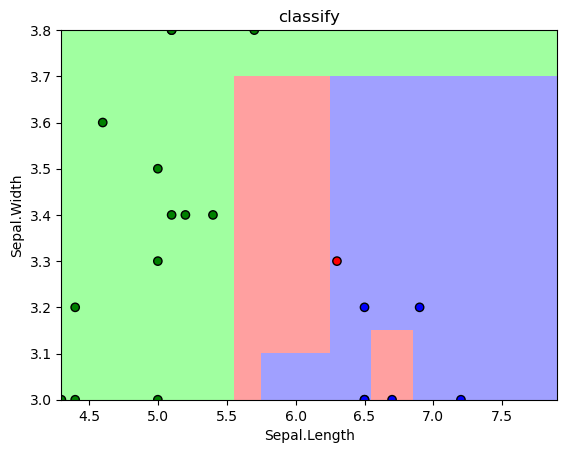

In [64]:
# 对惩罚系数0.8绘制可视化数据图像
softmax=LogisticRegression(penalty='l2', multi_class='multinomial', solver='lbfgs', C=0.8, max_iter=1000)
softmax=softmax.fit(data_train, target_train)

#test model
train_result.append(accuracy_score(softmax.predict(data_train), target_train))
test_result.append(accuracy_score(softmax.predict(data_test), target_test))

test_predict=softmax.predict(data_test)

classify_model=DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
classify_model.fit(classify_data, classify_label)

l, w=500, 500
x_min, y_min=min(classify_data)
x_max, y_max=max(classify_data)
t1=np.linspace(x_min, x_max, l)
t2=np.linspace(y_min, y_max, w)
x, y=np.meshgrid(t1, t2)
data_show=np.stack((x.flat, y.flat), axis=1)
label_predict=classify_model.predict(data_show)

cm_light=ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark=ListedColormap(['g', 'r', 'b'])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.pcolormesh(x, y, label_predict.reshape(x.shape), cmap=cm_light)
plt.scatter(sl, sw, c=test_predict, cmap=cm_dark, edgecolors='k')
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.title('classify')